In [1]:
#Importing All the Needed Libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [2]:
# Importing to a data frame.
df = pd.read_csv('2024_10_1_LAB-2_Spectral_Data.csv')
print(df)

      Wavelength (nm)  Group1_White_Paper  Group1_Epidote1  Group1_Epidote2  \
0                 350               0.408            0.134            0.053   
1                 351               0.403            0.123            0.048   
2                 352               0.393            0.127            0.042   
3                 353               0.377            0.133            0.043   
4                 354               0.370            0.116            0.058   
...               ...                 ...              ...              ...   
2146             2496               0.387            0.222            0.109   
2147             2497               0.386            0.220            0.108   
2148             2498               0.388            0.219            0.109   
2149             2499               0.390            0.220            0.110   
2150             2500               0.391            0.219            0.110   

      Group1_Epidote3  Group2_Gypsum1  Group2_Gypsu

In [3]:
print(df.columns.values)

list_lambda = df[df.columns.values[0]].values


['Wavelength (nm)' 'Group1_White_Paper' 'Group1_Epidote1'
 'Group1_Epidote2' 'Group1_Epidote3' 'Group2_Gypsum1' 'Group2_Gypsum2'
 'Group2_Gypsum3' 'Group3_Limonite1' 'Group3_Limonite2' 'Group3_LImonite3'
 'Group4_Realgar1' 'Group4_Realgar2' 'Group4_Realgar3'
 'Group5_Hornblende1' 'Group5_Hornblende2' 'Group5_Hornblende3'
 'Group6_Pyrite1' 'Group6_Pyrite2' 'Group6_Pyrite3']


In [4]:
import colour
import matplotlib.colors as mcolors

def wavelength_to_hex(wavelength):
    # Convert wavelength to XYZ color space
    xyz = colour.wavelength_to_XYZ(wavelength)
    
    # Convert XYZ to RGB
    rgb = colour.XYZ_to_sRGB(xyz)
    
    # Ensure RGB values are within bounds (0, 1) and then scale to (0, 255)
    rgb = [max(0, min(1, c)) for c in rgb]
    rgb = [int(c * 255) for c in rgb]
    
    # Convert to hex
    hex_color = mcolors.to_hex([x / 255.0 for x in rgb])
    
    return hex_color

# Example: Convert 500 nm (greenish) to hex
wavelength = 500  # Wavelength in nanometers
hex_color = wavelength_to_hex(wavelength)
print(f"Wavelength {wavelength} nm corresponds to hex color {hex_color}")


Wavelength 500 nm corresponds to hex color #00cd81


['Wavelength (nm)' 'Group1_White_Paper' 'Group1_Epidote1' 'Group1_Epidote2'
 'Group1_Epidote3' 'Group2_Gypsum1' 'Group2_Gypsum2' 'Group2_Gypsum3'
 'Group3_Limonite1' 'Group3_Limonite2' 'Group3_LImonite3' 'Group4_Realgar1'
 'Group4_Realgar2' 'Group4_Realgar3' 'Group5_Hornblende1'
 'Group5_Hornblende2' 'Group5_Hornblende3' 'Group6_Pyrite1'
 'Group6_Pyrite2' 'Group6_Pyrite3']
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3


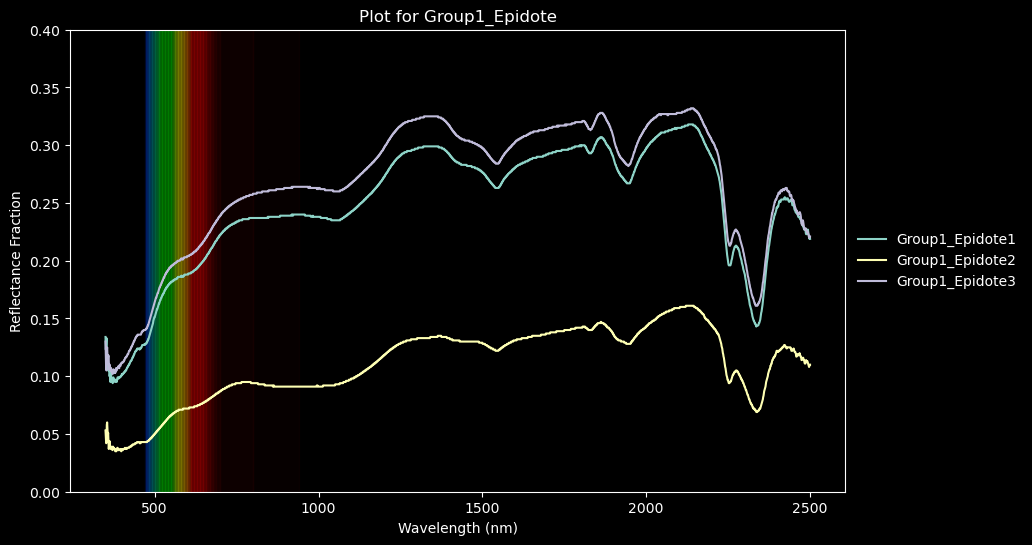

2
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3


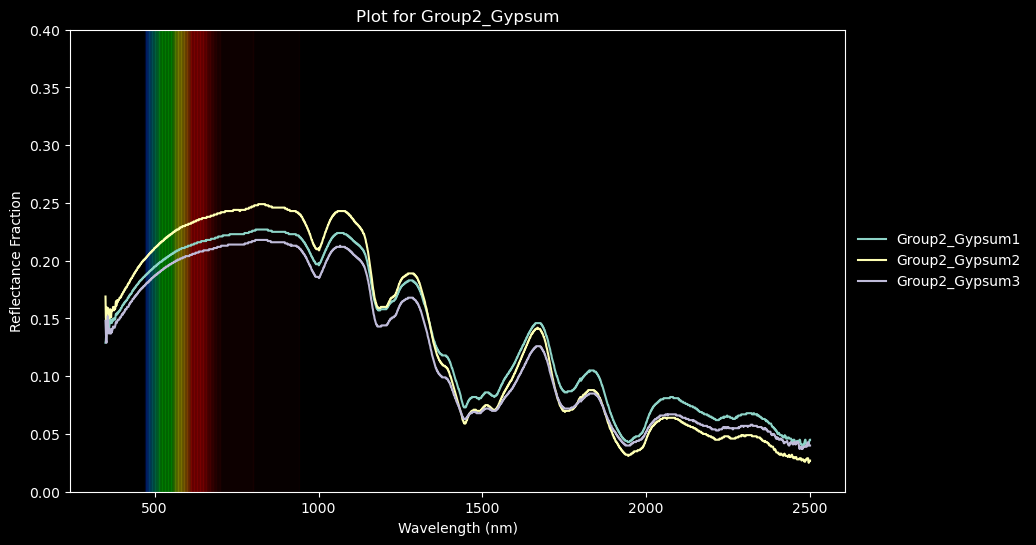

5
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3


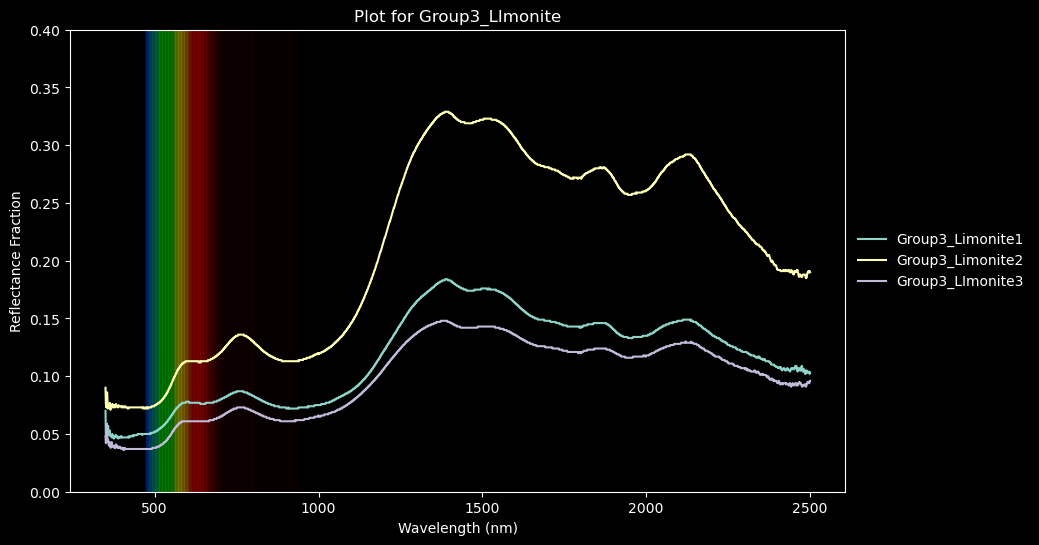

8
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3


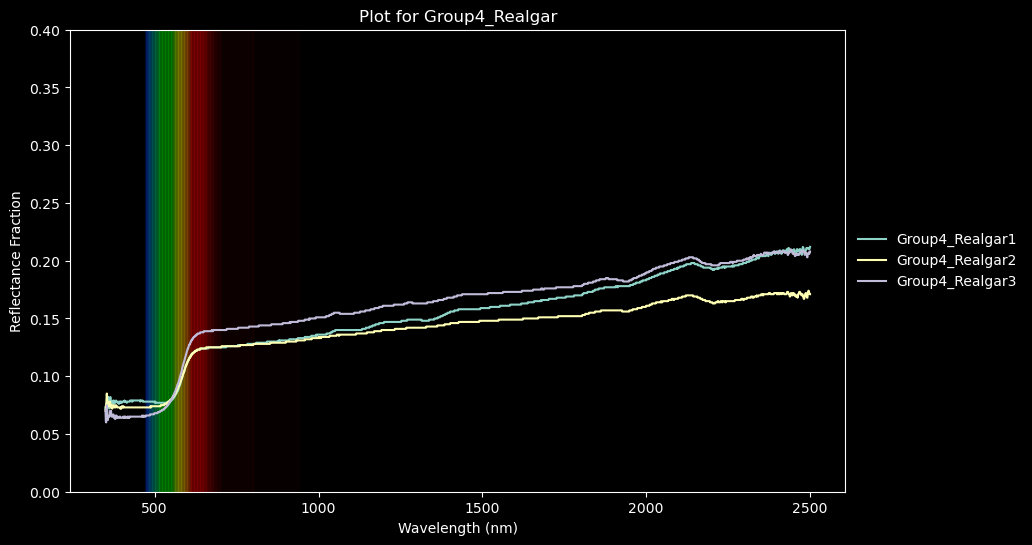

11
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3


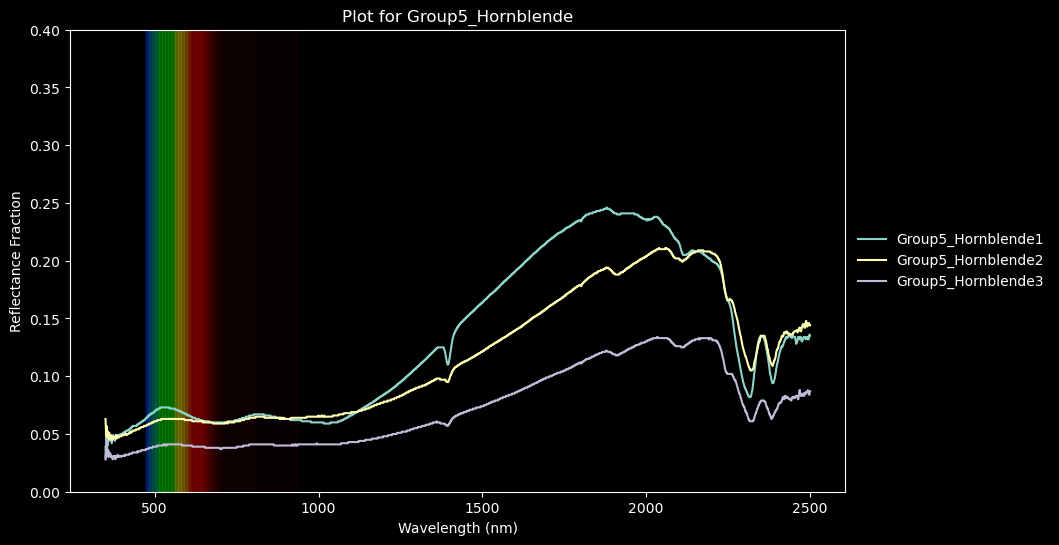

14
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


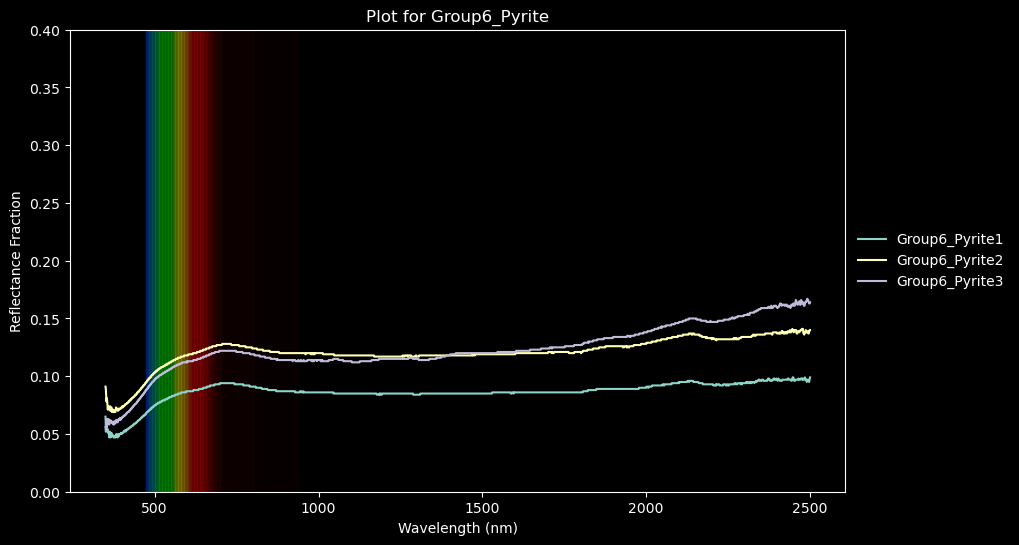

17
Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


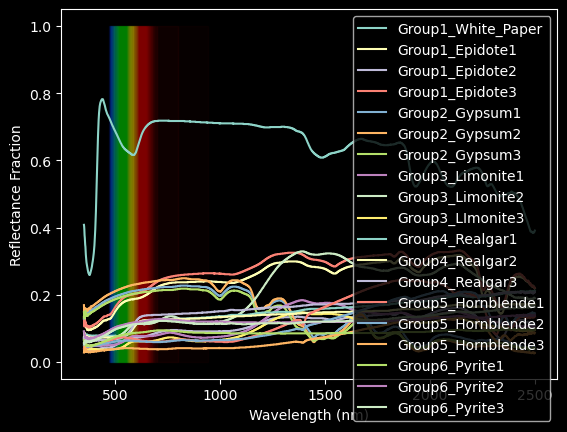

Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


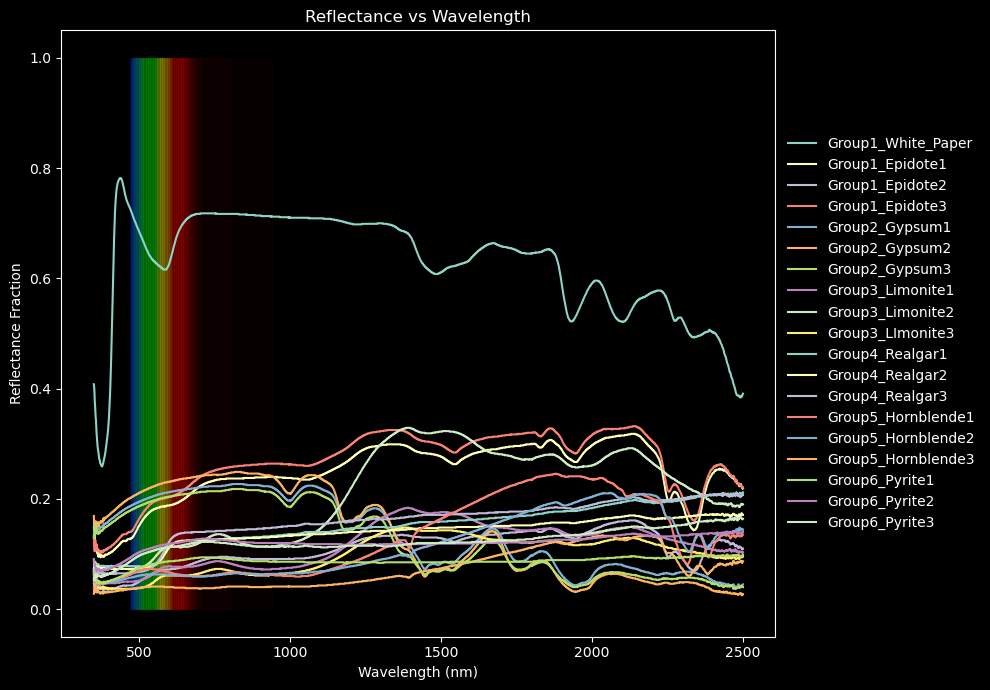

In [5]:
print(df.columns.values)

plt.style.use('dark_background')
def plt_spec():    
    # Wavelength range for the plot
    x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    # Create a plot
    #fig, ax = plt.subplots(figsize=(10, 7))
    
    # Loop over each color range and create a rectangle with the corresponding color
    for i in range(len(x)-1):
        color = wavelength_to_hex(x[i])
        a = x[i]+1
        plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)
    
    color_ranges = {
        'IRed': (700, 800),
        'IRed2': (800, 940)
    }
    
    # Define the corresponding colors
    color_map = {
        'IRed': '#440000',
        'IRed2': '#220000'
    }
    # Wavelength range for the plot
    x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    
    # Loop over each color range and create a rectangle with the corresponding color
    for color, (start_wl, end_wl) in color_ranges.items():
        plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.2)#, label=f"{start}-{end} nm")

    plt.figsize=(10, 7)

j=0
k=2
avg=0
for i in df.columns.values[2:]:
  
    if j == 0:
        plt.figure(figsize=(10, 6))
        plt_spec()

    j=j+1

    print(i)
    plt.plot(list_lambda,df[i].values,label=i)
    if j >= 3:
        plt.ylim(0,0.4)
        # Set the axis limits and labels
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Reflectance Fraction")
        
        #ax.set_yticks([])  # Remove y-axis ticks
        plt.title(f"Plot for {i[:-1]}")
        
        # Display the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

        plt.show()
        
        j=0
        avg=0
        print(k)
        k=k+3

    
   

       
j=0
avg=0
for i in df.columns.values[1:]:
    print(i)

    plt.plot(list_lambda,df[i].values,label=i)


# Set the axis limits and labels

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
plt.title("")
plt_spec()
# Display the plot
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
j = 0
avg = 0
for i in df.columns.values[1:]:
    print(i)
    plt.plot(list_lambda, df[i].values, label=i)

# Set the axis limits and labels
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")
plt.title("Reflectance vs Wavelength")

# Customizing the plot appearance (assuming plt_spec() is your style function)
plt_spec()

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Display the plot
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()


Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


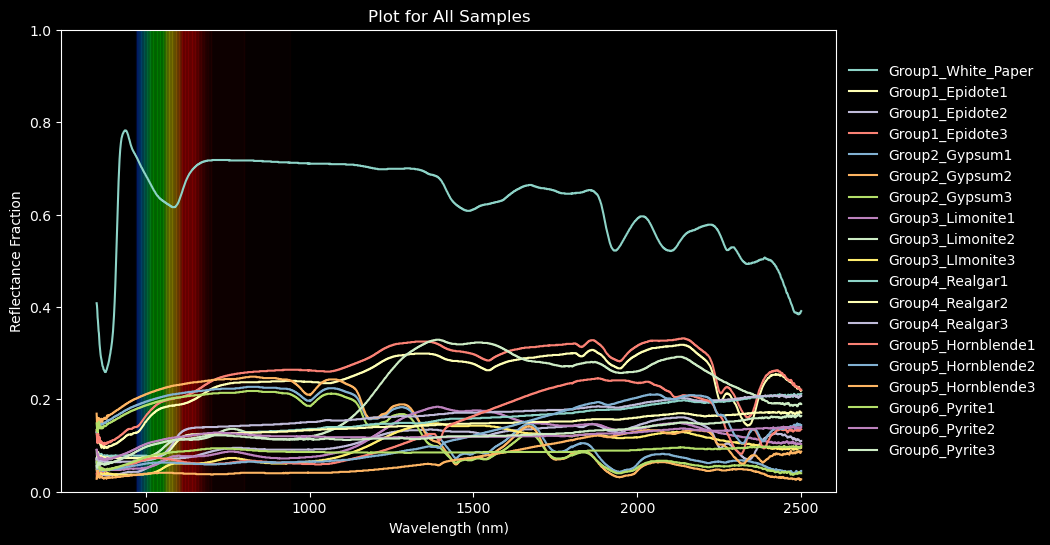

In [6]:
plt.figure(figsize=(10, 6))
plt_spec()

for i in df.columns.values[1:]:


    print(i)
    plt.plot(list_lambda,df[i].values,label=i)
plt.ylim(0,1)
    # Set the axis limits and labels
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")
    
    #ax.set_yticks([]all)  # Remove y-axis ticks
plt.title(f"Plot for All Samples")
    
    # Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)


Group1_White_Paper
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3


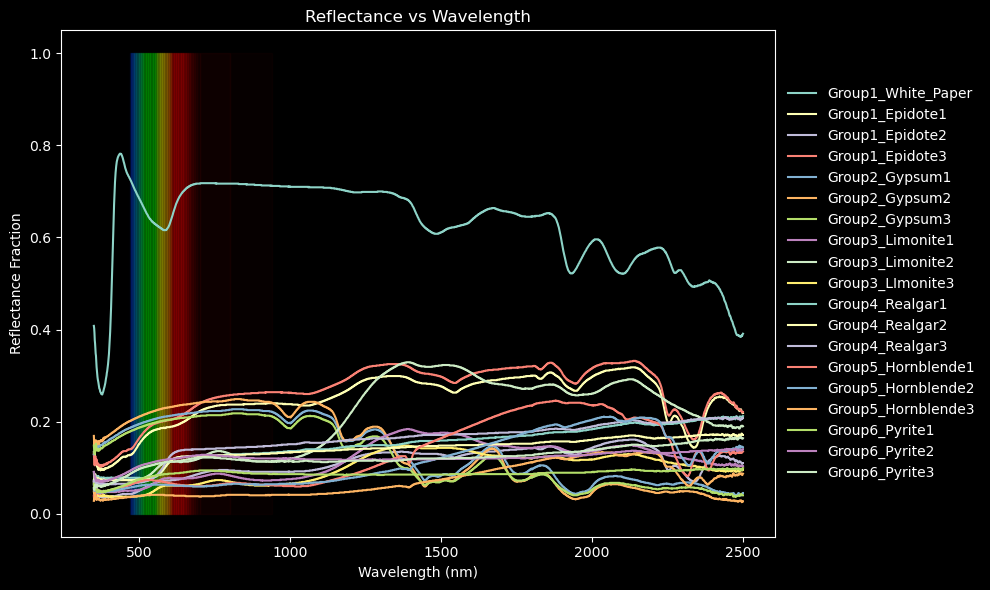

In [7]:
plt.figure(figsize=(10, 6))
j = 0
avg = 0
for i in df.columns.values[1:]:
    print(i)
    plt.plot(list_lambda, df[i].values, label=i)

# Set the axis limits and labels
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")
plt.title("Reflectance vs Wavelength")

# Customizing the plot appearance (assuming plt_spec() is your style function)
plt_spec()

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Display the plot
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()

['Wavelength (nm)' 'Group1_White_Paper' 'Group1_Epidote1' 'Group1_Epidote2'
 'Group1_Epidote3' 'Group2_Gypsum1' 'Group2_Gypsum2' 'Group2_Gypsum3'
 'Group3_Limonite1' 'Group3_Limonite2' 'Group3_LImonite3' 'Group4_Realgar1'
 'Group4_Realgar2' 'Group4_Realgar3' 'Group5_Hornblende1'
 'Group5_Hornblende2' 'Group5_Hornblende3' 'Group6_Pyrite1'
 'Group6_Pyrite2' 'Group6_Pyrite3']
Group1_Epidote1
Group1_Epidote2
Group1_Epidote3
2


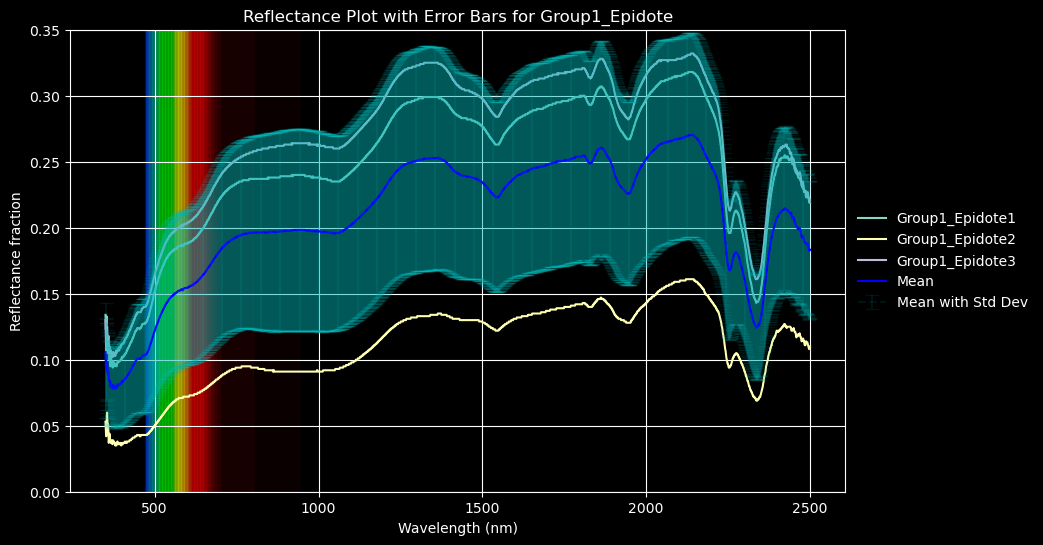

Group2_Gypsum1
Group2_Gypsum2
Group2_Gypsum3
5


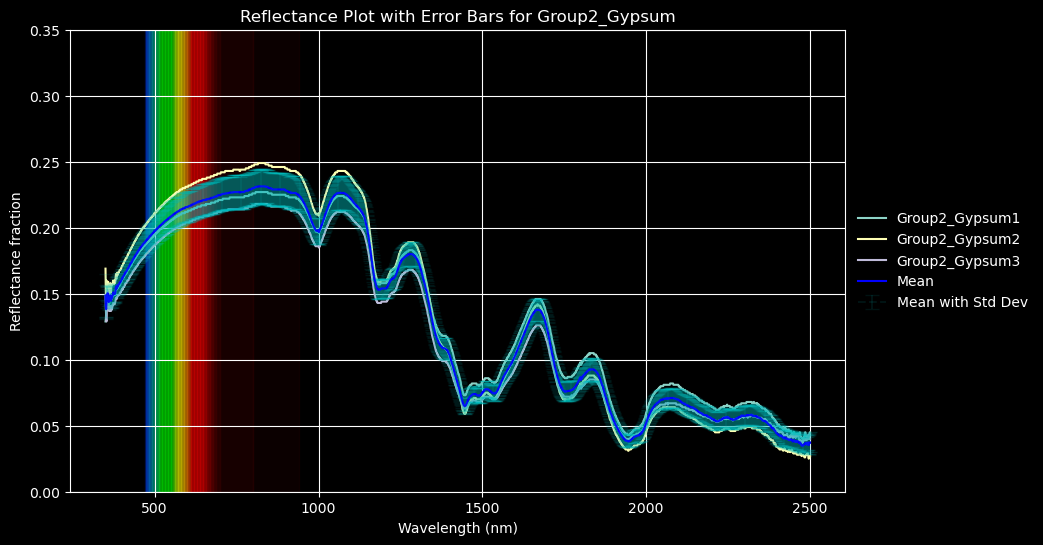

Group3_Limonite1
Group3_Limonite2
Group3_LImonite3
8


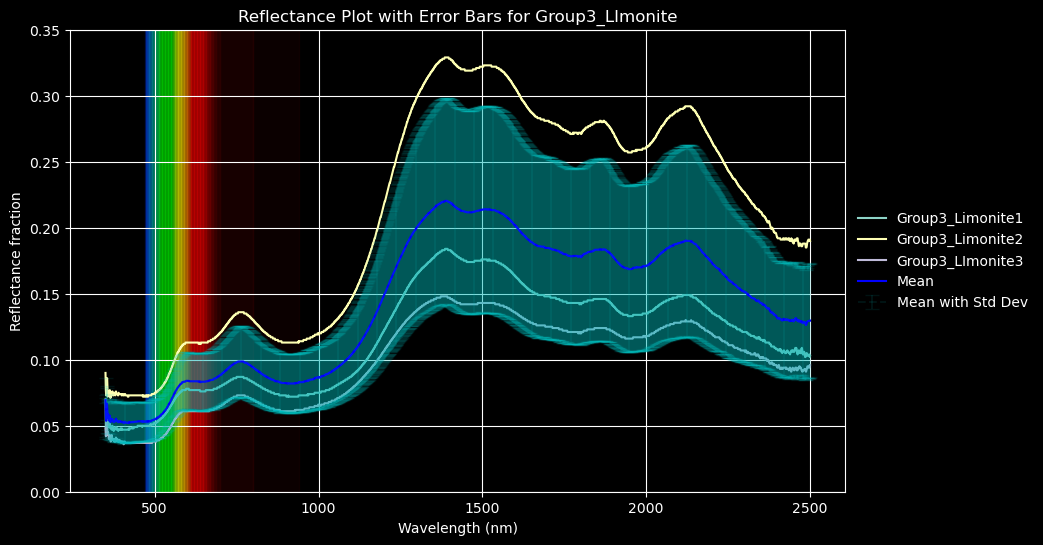

Group4_Realgar1
Group4_Realgar2
Group4_Realgar3
11


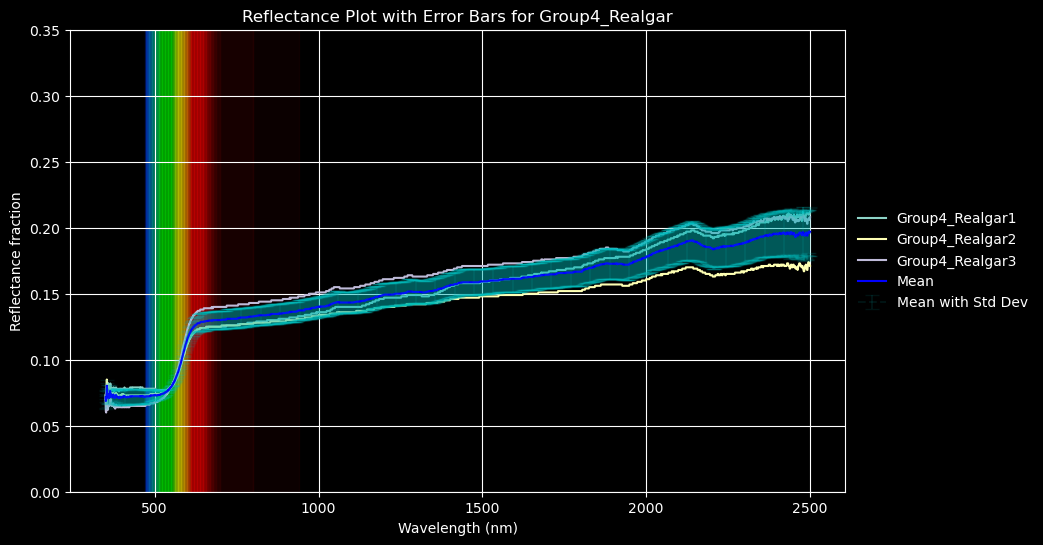

Group5_Hornblende1
Group5_Hornblende2
Group5_Hornblende3
14


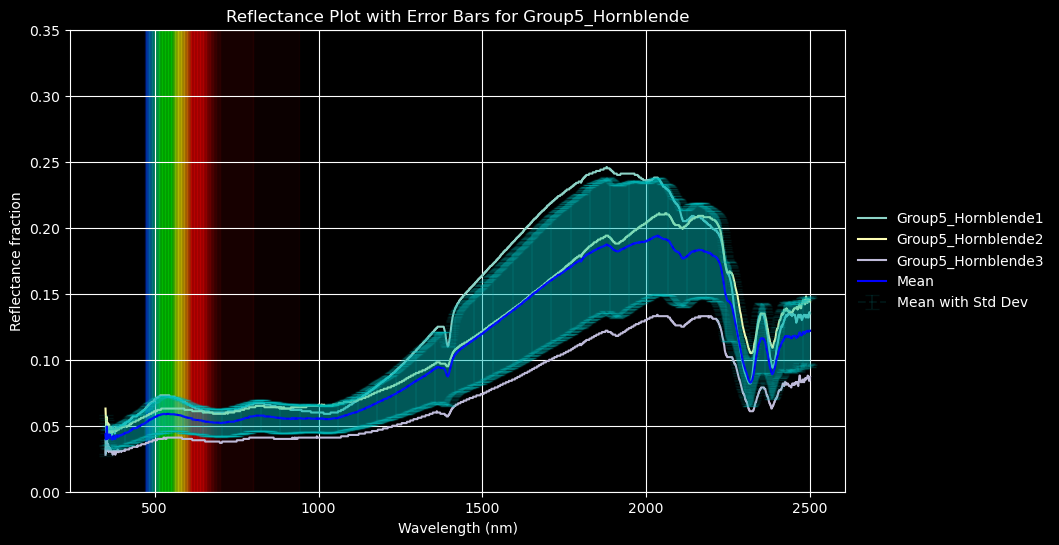

Group6_Pyrite1
Group6_Pyrite2
Group6_Pyrite3
17


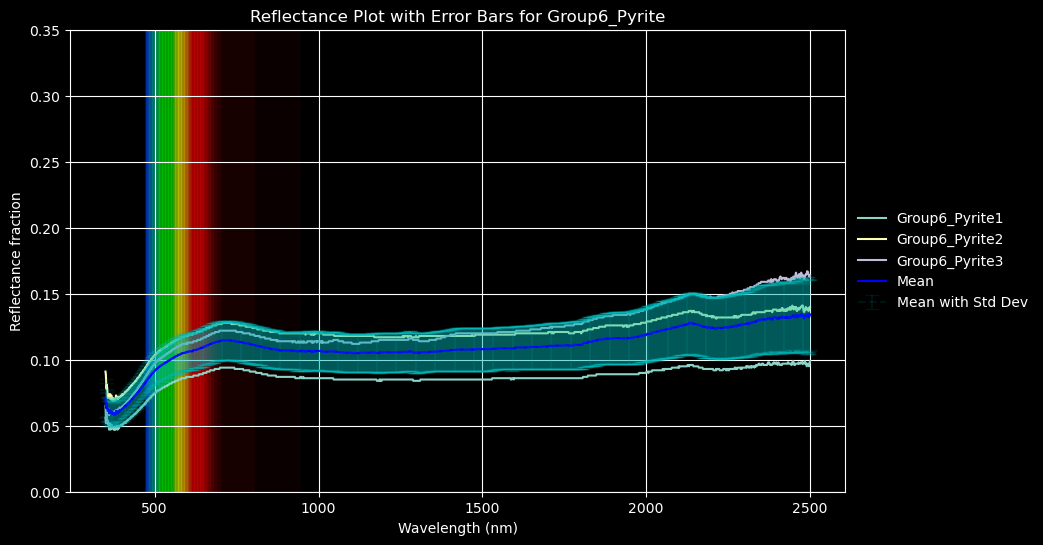

<Figure size 1000x600 with 0 Axes>

In [44]:
print(df.columns.values)

plt.style.use('dark_background')
def plt_spec():    
    # Wavelength range for the plot
    x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    # Create a plot
    #fig, ax = plt.subplots(figsize=(10, 7))
    
    # Loop over each color range and create a rectangle with the corresponding color
    for i in range(len(x)-1):
        color = wavelength_to_hex(x[i])
        a = x[i]+1
        plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)
    
    color_ranges = {
        'IRed': (700, 800),
        'IRed2': (800, 940)
    }
    
    # Define the corresponding colors
    color_map = {
        'IRed': '#440000',
        'IRed2': '#220000'
    }
    # Wavelength range for the plot
    x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    
    # Loop over each color range and create a rectangle with the corresponding color
    for color, (start_wl, end_wl) in color_ranges.items():
        plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.2)#, label=f"{start}-{end} nm")

    plt.figsize=(10, 7)


list_lambda = df[df.columns.values[0]].values
plt.show()

j=0
k=2
avg=0
plt.figure(figsize=(10, 6))
for i in df.columns.values[2:]:
    
    j=j+1
    print(i)
    plt.plot(list_lambda,df[i].values,label=i)

    if j >= 3:
        plt_spec()
        
        j=0
        avg=0
        plot3_errr(list_lambda,df[df.columns.values[k]].values,df[df.columns.values[k+1]].values,df[df.columns.values[k+2]].values)
        print(k)
        k=k+3
            # Customize the plot
        plt.title(f'Reflectance Plot with Error Bars for {i[:-1]}')
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Reflectance fraction')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
        plt.grid(True)
        plt.ylim(0,0.35)
        plt.show()
        plt.figure(figsize=(10, 6))




In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Example x and y data
x = np.array([1, 2, 3, 4, 5])  # Example x data
y1 = np.array([1.0, 2.1, 3.3, 4.2, 5.1])  # First y data set
y2 = np.array([0.9, 2.0, 3.2, 4.0, 5.0])  # Second y data set
y3 = np.array([1.1, 2.2, 3.4, 4.3, 5.2])  # Third y data set

def plot3_errr(x,y1,y2,y3):
    plt_spec()
    # Stack the y data to compute mean and std deviation
    y_data = np.vstack([y1, y2, y3])
    
    # Calculate the mean and standard deviation
    y_mean = np.mean(y_data, axis=0)
    y_std = np.std(y_data, axis=0)
    
    # Plot the average with error bars (standard deviation)
    plt.errorbar(x, y_mean, yerr=y_std, fmt='--',c="c", capsize=5, label='Mean with Std Dev',alpha=0.1)
    plt.plot(x, y_mean,"b-",alpha=1,label='Mean')
   

    # Show the plot


In [12]:
# Importing to a data frame.
dfms = pd.read_excel('lab1_planetry.xlsx')
print(dfms)
list_lambda_ms = dfms["wavelength"].values
print(list_lambda_ms)


   wavelength   ref  sample1  sample2  sample3  sample4        u1        u2  \
0         470   940      298      149      197      122  0.022550  0.015610   
1         555   803      616      185      217      150  0.043810  0.020636   
2         585   825      636      179      202      205  0.043288  0.019685   
3         605   860      652      183      172      244  0.041778  0.019001   
4         635  1021      783      177      172      187  0.038314  0.015509   
5         660  1012      746      280      267      248  0.037418  0.019993   
6         695  1116     1130      460      477      526  0.044808  0.023987   
7         880  1008      666      912      847      893  0.034722  0.043519   
8         940   922      475      805      739      782  0.030779  0.044541   

         u3       u3b  
0  0.017927  0.014217  
1  0.022519  0.018620  
2  0.020969  0.021156  
3  0.018443  0.022204  
4  0.015299  0.015926  
5  0.019411  0.018670  
6  0.024559  0.026128  
7  0.041241  0.04

Group1_Epidote1
done
Group2_Gypsum1
done
Group3_Limonite1
done
Group4_Realgar1
done
Group5_Hornblende1
done
Group6_Pyrite1
done


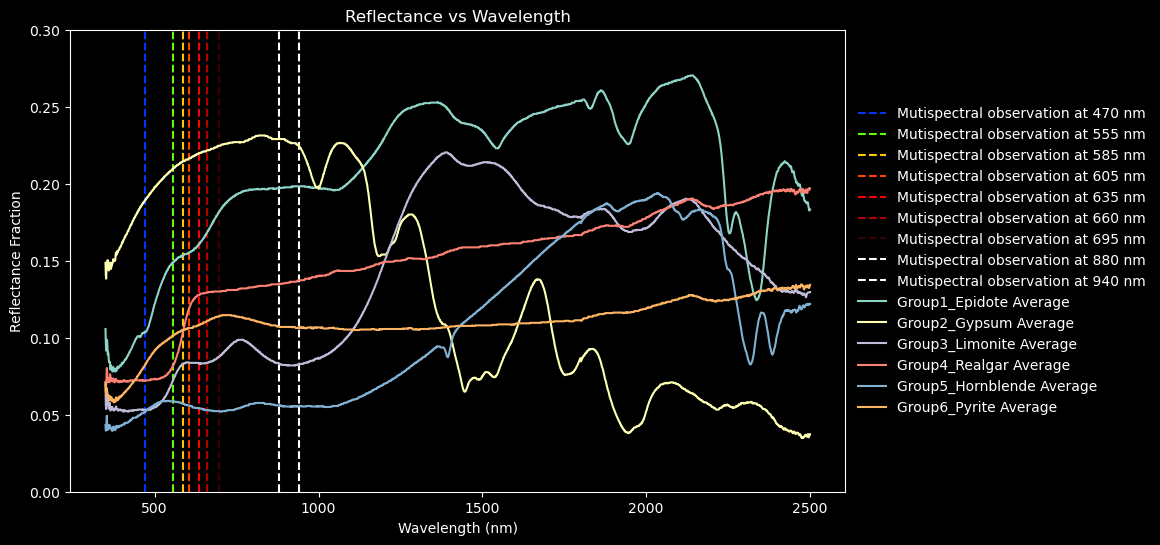

In [13]:
import random

plt.figure(figsize=(10, 6))

# List of x-values where you want to plot vertical lines

# Function to generate random RGB color
def get_random_color():
    return (random.random(), random.random(), random.random())  # Random (R, G, B)



#plt_spec()
for x in list_lambda_ms[:-2]:
    color = wavelength_to_hex(x)
    plt.axvline(x=x,alpha = 1 ,color=color, linestyle='--', label=f'Mutispectral observation at {x} nm')
# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

for x in list_lambda_ms[-2:]:
    color = get_random_color()
    plt.axvline(x=x,alpha = 1 ,color="w", linestyle='--', label=f'Mutispectral observation at {x} nm')
# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


     
j=0
avg=0

for i in range(2,len(df.columns.values),3):
    j=j+1
    
    print(df.columns.values[i])
    avg = (df[df.columns.values[i]].values + df[df.columns.values[i+1]].values+df[df.columns.values[i+2]].values)/3
    print("done")
    name = df.columns.values[i]
    plt.plot(list_lambda,avg,label=f"{name[:-1]} Average")


    j=0
    avg=0


plt.ylim(0,0.3)

# Set the axis limits and labels

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
plt.title("Reflectance vs Wavelength")
# Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()



In [15]:
# Example lists
long_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
long_y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

short_x = [2, 5, 8]  # x-values for which you want corresponding y-values from long_y

def getshorty(long_x, long_y, short_x):
    # Initialize an empty list to store the corresponding y-values
    short_y = []

    # Iterate over the short_x values and get corresponding long_y values
    for x in short_x:
        if x in long_x:  # Check if the x value is present in long_x
            index = long_x.index(x)  # Get the index of the x value in long_x
            short_y.append(long_y[index])  # Get the corresponding y value from long_y

    # Output the corresponding y-values
    return short_y

# Get the corresponding y-values    
short_y = getshorty(long_x, long_y, short_x)
print(short_y)

[20, 50, 80]


Group1_Epidote1
done
Group2_Gypsum1
done
Group3_Limonite1
done
Group4_Realgar1
done
Group5_Hornblende1
done
Group6_Pyrite1
done


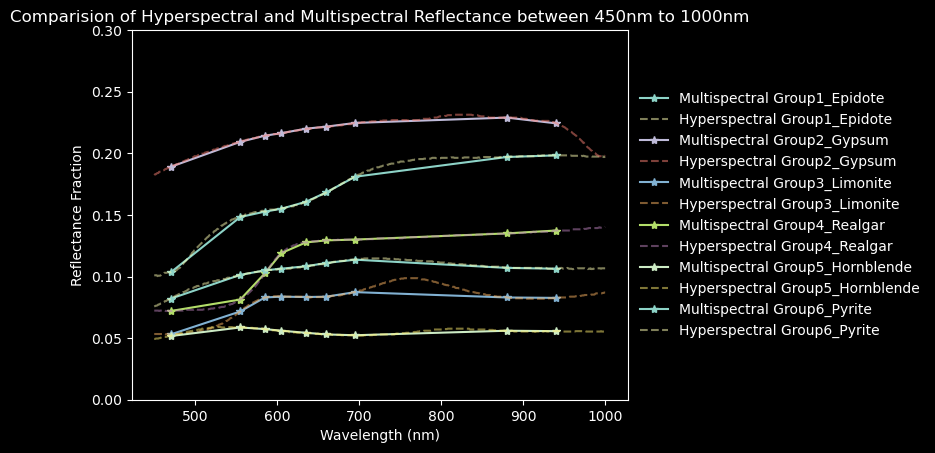

   wavelength  Group1_Epidote1  Group2_Gypsum1  Group3_Limonite1  \
0         470            0.103           0.189             0.053   
1         555            0.148           0.209             0.072   
2         585            0.153           0.214             0.083   
3         605            0.155           0.216             0.084   
4         635            0.161           0.220             0.083   
5         660            0.168           0.222             0.084   
6         695            0.181           0.225             0.087   
7         880            0.197           0.229             0.083   
8         940            0.198           0.224             0.083   

   Group4_Realgar1  Group5_Hornblende1  Group6_Pyrite1  
0            0.072               0.052           0.082  
1            0.081               0.059           0.101  
2            0.103               0.057           0.105  
3            0.119               0.056           0.106  
4            0.128               0

In [20]:
#creating a new data frame to save the extracted  data and save in this
df_extracted = pd.DataFrame()
df_extracted["wavelength"] = list_lambda_ms
     
j=0
avg=0
xmin = 450
xmax = 1000
for i in range(2,len(df.columns.values),3):
    j=j+1
    
    print(df.columns.values[i])
    avg = (df[df.columns.values[i]].values + df[df.columns.values[i+1]].values+df[df.columns.values[i+2]].values)/3
    short_y = getshorty(list(list_lambda), list(avg), list(list_lambda_ms))



    print("done")
    name = df.columns.values[i]
    
    df_extracted[name] = np.round(short_y,3)

    plt.plot(list_lambda_ms,short_y,"-*",label=f"Multispectral {name[:-1]} ")

            # Filter long_x and long_y for values within the range [xmin, xmax]
    filtered_x = [ x for x in list_lambda if xmin <= x <= xmax]
    filtered_y = [avg[list(list_lambda).index(x)] for x in filtered_x]

    # Plot the filtered data
    plt.plot(filtered_x, filtered_y, "--",alpha =0.5 , label=f'Hyperspectral {name[:-1]}')



    j=0
    avg=0


plt.ylim(0,0.3)

# Set the axis limits and labels

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
plt.title("Comparision of Hyperspectral and Multispectral Reflectance between 450nm to 1000nm")
# Display the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

#save the df as an excel
print(df_extracted)


In [21]:
df_extracted.to_excel("extracted_data.xlsx")